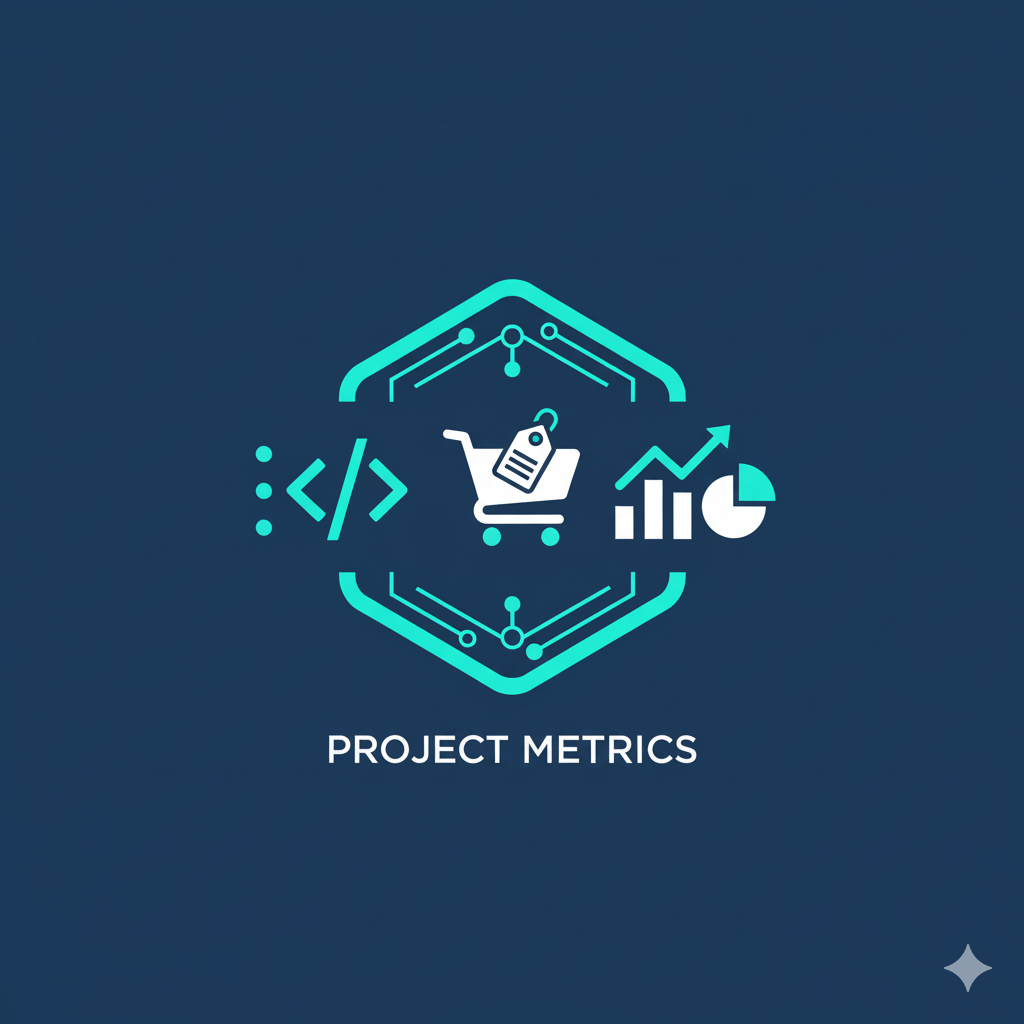

# Group Project 25-26_RM402E: Statistics and Data Analysis


> Professor: AHMED ATIL




---


07/11/2025



---



*   **YASSER EL KHAMLICHI ETU20251750**
*   **ABHISHEKH RENGASAMY KALAIVANAN ETU20250527**
*   **JOSEPH ANCIL EDMOND ETU20250447**





### 1) Introduction


Optimizing E-commerce Delivery and Profit Margin: A Data-Driven Logistics Analysis

We picked an e-commerce sales data for the competitivity of the e-com landscape, where SCM shine with it's efficiency. Focusing on on variables such as:
* variables for the order caracteristics ( cuatomer location, volume, category)
* variables of key performance indicators ( delivery cost, delivery time)

Simply because they are critical to the customer satisfaction and financial viability, so we try to establish the direct link as our challenge

Our objective is to employ statistical modeling and data analysis techniques to achieve two core goals:

* Identify Cost Drivers: Pinpoint which order features are statistically significant predictors of high shipping costs and prolonged delivery times.
* Optimize Profitability: Use these insights to recommend actionable strategies for cost reduction (especially in high-cost regions/categories) and operational efficiencies, ultimately maximizing the company's profit margin without compromising customer experience.

This Logistics and Data Analysis project uses e-commerce sales data to identify how order characteristics (like region and category) drive delivery costs and time, directly impacting the profit margin. Our primary goal is to pinpoint areas for cost reduction and operational efficiency.

### 2) Data Loading

In [1]:
# all important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# reading and storing my file in df variable
df = pd.read_csv("ecommerce_sales.csv")

In [3]:
# previewing a part of my data
print(df.head(5))
print("-" * 100)
# all data columns
print(df.columns)

  order_id customer_id product_id     category   price  discount  quantity  \
0  O100000      C17270    P234890         Home  164.08      0.15         1   
1  O100001      C17603    P228204      Grocery   24.73      0.00         1   
2  O100002      C10860    P213892  Electronics  175.58      0.05         1   
3  O100003      C15390    P208689  Electronics   63.67      0.00         1   
4  O100004      C15226    P228063         Home   16.33      0.15         1   

  payment_method  order_date  delivery_time_days region returned  \
0    Credit Card  2023-12-23                   4   West       No   
1    Credit Card  2025-04-03                   6  South       No   
2    Credit Card  2024-10-08                   4  North       No   
3            UPI  2024-09-14                   6  South       No   
4            COD  2024-12-21                   6   East       No   

   total_amount  shipping_cost  profit_margin  customer_age customer_gender  
0        139.47           7.88          31.1

### 3) Data Preparation

In [4]:
# usual preparations of columns necessary
price = df["price"]
qty = df["quantity"]
cost = df["shipping_cost"]
tot = df["total_amount"]
margin = df["profit_margin"]
delivery_days = df['delivery_time_days']
discount = df['discount']

In [5]:
# testing if the varaibles have any missing data
# testing function
def has_missing_data(dt):
  return dt.isna().sum() != 0

# applying the function on my data
for i in [price, qty, cost, tot, margin, delivery_days]:
  if has_missing_data(i):
    # now we replace missing data with mean ( technique chosen by the team )
    i.fillna(i.mean())

# checking
print(df.isna().sum())

order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
dtype: int64


In [6]:
# transforming values to numeric just in case
for i in [price, qty, cost, tot, margin, delivery_days]:
  i = pd.to_numeric(i)

# we check
print(df.dtypes)

order_id               object
customer_id            object
product_id             object
category               object
price                 float64
discount              float64
quantity                int64
payment_method         object
order_date             object
delivery_time_days      int64
region                 object
returned               object
total_amount          float64
shipping_cost         float64
profit_margin         float64
customer_age            int64
customer_gender        object
dtype: object


In [7]:
# Delivery days check for any anomalies
print(delivery_days.describe())

count    34500.000000
mean         4.814203
std          1.242141
min          3.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         13.000000
Name: delivery_time_days, dtype: float64


In [8]:
# total  = price * quantity and applying the discounts if any
# creating new column to have an idea about overall cost per order
df['order_cost'] = price * qty + cost
# creating new column for net revenue 
df['revenue'] = price * qty - (1- discount)
# total costs
df['total_costs'] = df['revenue'] - margin
# previewing the new data

print(df.head(5))


  order_id customer_id product_id     category   price  discount  quantity  \
0  O100000      C17270    P234890         Home  164.08      0.15         1   
1  O100001      C17603    P228204      Grocery   24.73      0.00         1   
2  O100002      C10860    P213892  Electronics  175.58      0.05         1   
3  O100003      C15390    P208689  Electronics   63.67      0.00         1   
4  O100004      C15226    P228063         Home   16.33      0.15         1   

  payment_method  order_date  delivery_time_days region returned  \
0    Credit Card  2023-12-23                   4   West       No   
1    Credit Card  2025-04-03                   6  South       No   
2    Credit Card  2024-10-08                   4  North       No   
3            UPI  2024-09-14                   6  South       No   
4            COD  2024-12-21                   6   East       No   

   total_amount  shipping_cost  profit_margin  customer_age customer_gender  \
0        139.47           7.88          31.

### 4) Programming Logic

             profit_margin     revenue  total_costs
category                                           
Electronics      344371.77  3494433.05   3150061.28
Home             262633.70  1125774.57    863140.87
Sports           160521.41   658064.96    497543.55
Fashion          128814.65   489143.88    360329.23
Beauty            49196.59   156758.19    107561.60
Toys              33669.25   134573.03    100903.78
Grocery           -9187.96    82264.24     91452.20


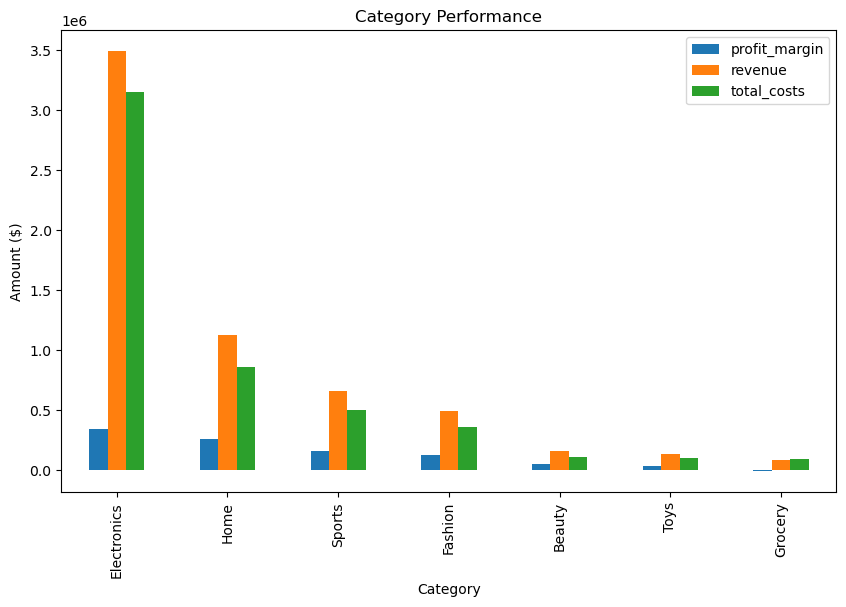

In [9]:
# grouping by category to have an idea about which category is performing well
grouped_data = df.groupby('category')[['profit_margin','revenue','total_costs']].sum().sort_values(by='profit_margin', ascending=False)
print(grouped_data)
# plotting the grouped data for better visualization
grouped_data.plot(kind='bar', figsize=(10,6))
plt.title('Category Performance')
plt.ylabel('Amount ($)')
plt.xlabel('Category')
plt.show()

         profit_margin     revenue  total_costs
region                                         
South        211081.17  1357978.36   1146897.19
North        208493.58  1318474.98   1109981.40
West         197385.73  1239492.89   1042107.16
East         195035.24  1239015.04   1043979.80
Central      158023.69   986050.65    828026.96


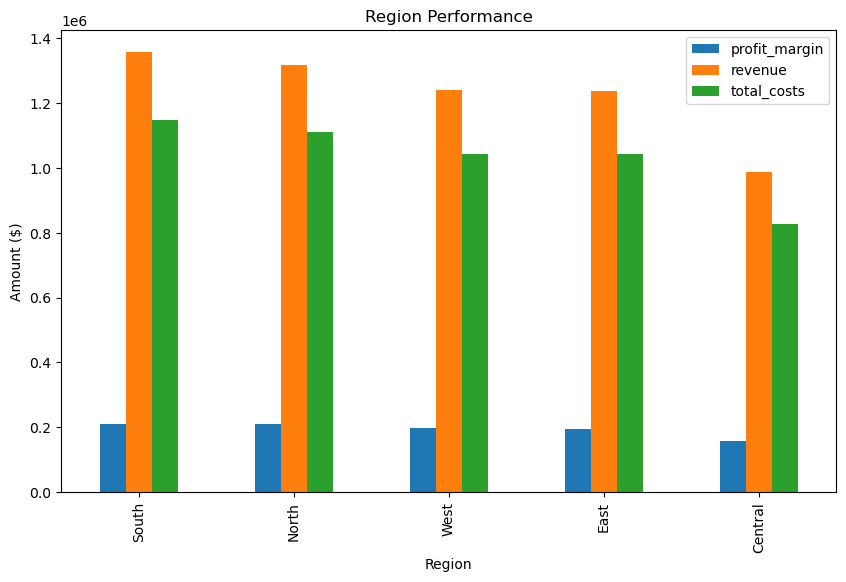

In [10]:
# doing the same for region
grouped_data = df.groupby('region')[['profit_margin','revenue','total_costs']].sum().sort_values(by='profit_margin', ascending=False)
print(grouped_data)
# plotting the grouped data for better visualization
grouped_data.plot(kind='bar', figsize=(10,6))
plt.title('Region Performance')
plt.ylabel('Amount ($)')
plt.xlabel('Region')
plt.show()

##### From initial analytics we can directly decide that region has low impact on revnue and financial KPIs

average delivery: category
Fashion        4.866965
Electronics    4.816990
Home           4.808092
Sports         4.801007
Beauty         4.798684
Grocery        4.792262
Toys           4.789263
Name: delivery_time_days, dtype: float64


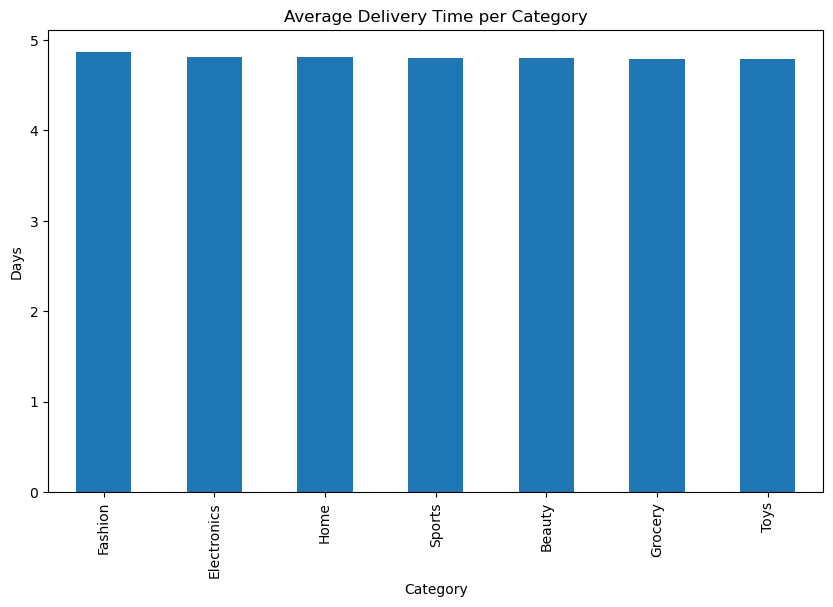

In [11]:
# Further analysis with Category
# delivery_time_days average per category 
avg_delivery_delay_per_cat = df.groupby("category")["delivery_time_days"].mean().sort_values(ascending=False)
print(f"average delivery: {avg_delivery_delay_per_cat}")
# plotting
avg_delivery_delay_per_cat.plot(kind='bar', figsize=(10,6))
plt.title('Average Delivery Time per Category')
plt.ylabel('Days')
plt.xlabel('Category')
plt.show()


average delivery: region
East       5.988847
South      5.005406
West       5.000881
Central    4.006392
North      3.984680
Name: delivery_time_days, dtype: float64


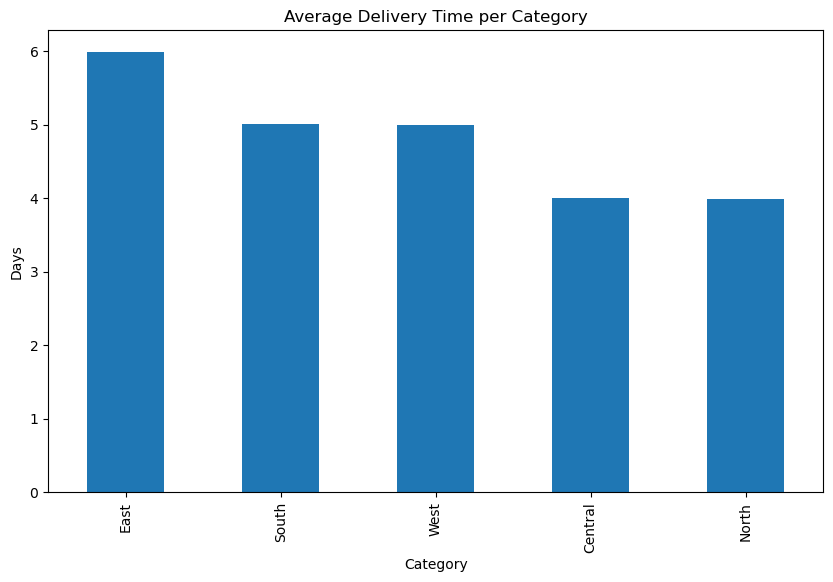

In [12]:
# delivery_time_days average per region 
avg_delivery_delay_per_reg = df.groupby("region")["delivery_time_days"].mean().sort_values(ascending=False)
print(f"average delivery: {avg_delivery_delay_per_reg}")
# plotting
avg_delivery_delay_per_reg.plot(kind='bar', figsize=(10,6))
plt.title('Average Delivery Time per Category')
plt.ylabel('Days')
plt.xlabel('Category')
plt.show()

##### While region didn't have any significant impact on the financial data, it did influence delivery time 

   order_id     category  profit_margin low_margin
0   O100000         Home          31.17       good
1   O100001      Grocery          -2.62       weak
2   O100002  Electronics          13.44       weak
3   O100003  Electronics           2.14       weak
4   O100004         Home           1.15       weak
5   O100005       Beauty          37.35       good
6   O100006  Electronics          22.88       weak
7   O100007       Beauty          -0.02       weak
8   O100008      Fashion          -1.23       weak
9   O100009      Grocery          -1.89       weak
10  O100010       Beauty           0.52       weak
11  O100011       Beauty           3.58       good
12  O100012      Grocery          -4.23       weak
13  O100013         Toys          -0.50       weak
14  O100014         Home          14.04       good
15  O100015         Home           5.13       good
16  O100016       Sports          23.93       good
17  O100017      Fashion          12.32       good
18  O100018  Electronics       

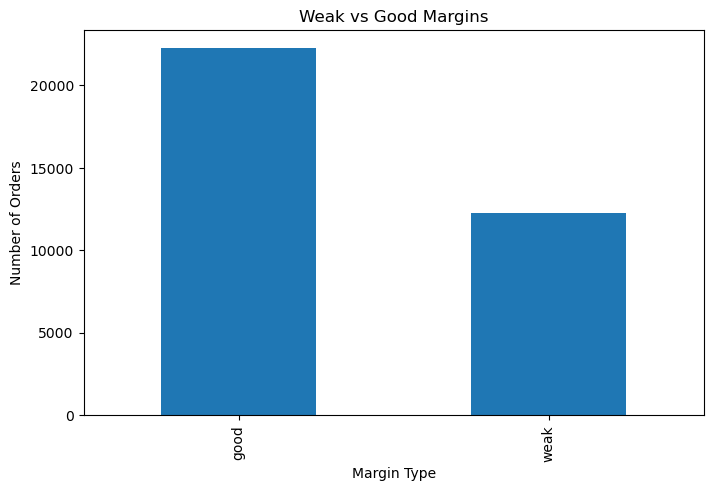

In [13]:
# weakest margins lower than 10% of total amount
def identifier_weak_margin(row):
    marge_minimale_requise = row['total_amount'] * 0.1
    if row['profit_margin'] < marge_minimale_requise:
        return "weak"  # weak margin
    else:
        return "good"  # good margin

# correcting the dataframe by adding a new column
df['low_margin'] = df.apply(identifier_weak_margin, axis=1)

# verifying the new column knowing 1 is weak margin and 0 is good margin:
print(df[['order_id','category', 'profit_margin', 'low_margin']].head(20))
# plotting the weak vs good margins
margin_counts = df['low_margin'].value_counts()
margin_counts.plot(kind='bar', figsize=(8,5))
plt.title('Weak vs Good Margins')
plt.ylabel('Number of Orders')
plt.xlabel('Margin Type')
plt.show()

In [14]:
## the top 3 categories with the highest average shipping cost
# mean of the delivery cost by category
cout_moyen_par_categorie = df.groupby('category')['shipping_cost'].mean()
# ordering
top_categories_cout = cout_moyen_par_categorie.sort_values(ascending=False)
# printing the first 3
print("Top 3 with the highest delivery cost: ")
print(top_categories_cout.head(3))

Top 3 with the highest delivery cost: 
category
Electronics    8.727034
Home           7.129098
Sports         6.815052
Name: shipping_cost, dtype: float64


### 5) Probabilities

Delivery Time Consistency Analysis: Standard Deviation ($\sigma$) for Reliability
* Standard Deviation ($\sigma$) and Visualization (Box Plot)
* Which shipping region exhibits the highest volatility and unpredictability in delivery times, indicating a need for targeted logistical overhaul?
* High $\sigma$ means inconsistent customer experience. Optimizing the region with the highest $\sigma$ by targeting logistics failures (e.g., specific carrier issues) reduces customer service costs and churn.

             mean       std  count
region                            
Central  4.006392  1.008380   5632
West     5.000881  1.007829   6808
South    5.005406  0.995359   7584
North    3.984680  0.990126   7572
East     5.988847  0.987253   6904


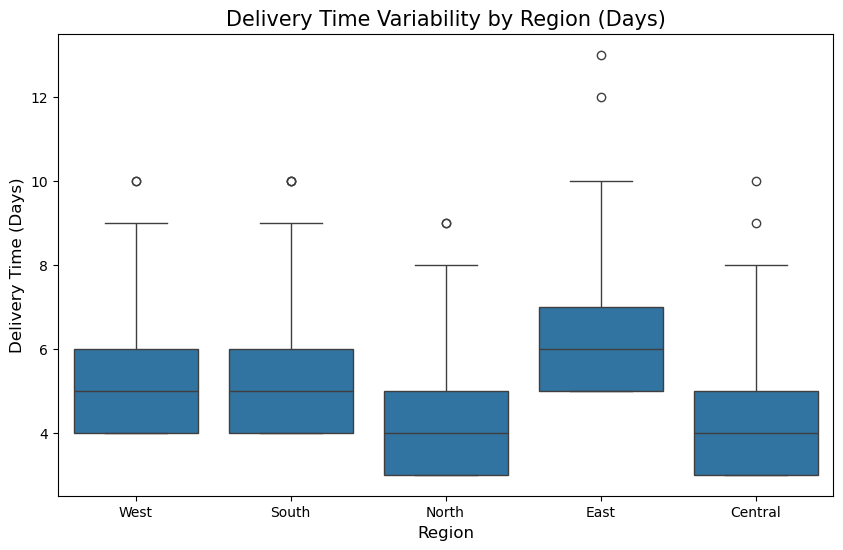

In [15]:
delivery_stats = df.groupby('region')['delivery_time_days'].agg(['mean', 'std', 'count']).sort_values(by='std', ascending=False)
df['low_margin'] = np.where(df['profit_margin'] <= (0.10 * df['total_amount']), 1, 0)
print(delivery_stats)

# Visualization: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='delivery_time_days', data=df)
plt.title('Delivery Time Variability by Region (Days)', fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Delivery Time (Days)', fontsize=12)
plt.savefig('delivery_time_variability_boxplot.png')
plt.show()

>> Statistical Conclusion: The Central and West regions exhibit the highest variability (highest $\sigma$) in delivery times. While the average delivery time might be good (e.g., Central is fast), the consistency is poor.>> 

>> Optimization Implication: The focus for operational improvement should shift to the Central and West regions, not just the slowest region (East, which is slow but consistent). Inconsistent delivery leads to higher customer service costs, failed deliveries, and negative reviews. The optimization goal here is to reduce the $\sigma$ to improve predictability.

Impact of Shipping Cost on Profitability: Independent Samples T-Test
* Independent Samples T-Test
* Is the difference in the average shipping cost between low-margin orders (Profit Margin $\leq 10\%$ of Total Amount) and high-margin orders statistically significant ($p < 0.05$)?
* If the difference is significant, it provides hard evidence that negotiating better carrier contracts or implementing dynamic shipping fees is the most critical step to recover low-margin orders.

Mean Shipping Cost (Low Margin): $5.20
Mean Shipping Cost (High Margin): $6.68
T-statistic: -56.6016
P-value: 0.0000


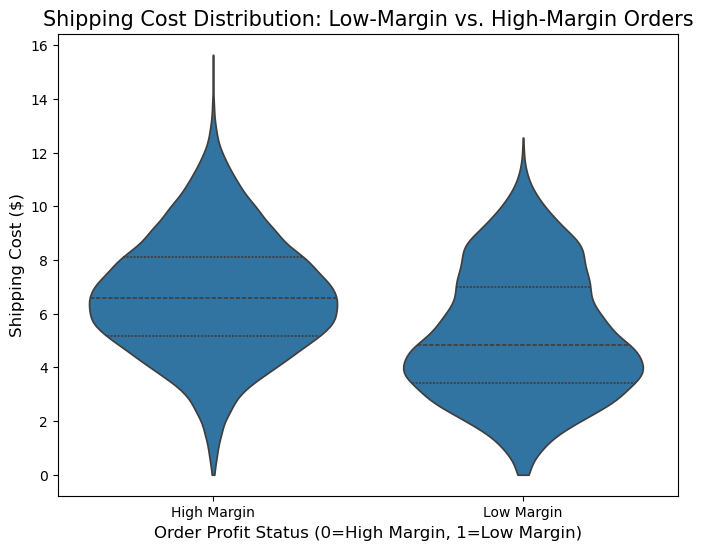

In [16]:
low_margin_costs = df[df['low_margin'] == 1]['shipping_cost']
high_margin_costs = df[df['low_margin'] == 0]['shipping_cost']

# Perform Independent Samples T-Test (unequal variances assumed for safety)
t_stat, p_value = ttest_ind(low_margin_costs, high_margin_costs, equal_var=False)

mean_low = low_margin_costs.mean()
mean_high = high_margin_costs.mean()

print(f"Mean Shipping Cost (Low Margin): ${mean_low:.2f}")
print(f"Mean Shipping Cost (High Margin): ${mean_high:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualization: Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='low_margin', y='shipping_cost', data=df,
               inner='quartile', cut=0)
plt.title('Shipping Cost Distribution: Low-Margin vs. High-Margin Orders', fontsize=15)
plt.xlabel('Order Profit Status (0=High Margin, 1=Low Margin)', fontsize=12)
plt.ylabel('Shipping Cost ($)', fontsize=12)
plt.xticks([0, 1], ['High Margin', 'Low Margin'])
plt.savefig('shipping_cost_violinplot.png')
plt.show()

>> Statistical Conclusion: The $p$-value ($0.0000$) is much less than the significance level ($\alpha=0.05$), so we reject the null hypothesis. The difference in mean shipping costs between the two groups is statistically significant.

>> Business Insight: The key insight is that orders with high profit margins actually have a significantly higher average shipping cost ($6.68) than low-margin orders ($5.20).

>> Optimization Implication: This strongly suggests that shipping cost is NOT the primary cause of low profit margin

Profitability Differences Across Categories: Analysis of Variance (ANOVA)
* One-Way ANOVA with Tukey's HSD Post-Hoc Test
* Are the mean profit margins statistically different across all product categories? If so, which specific category pairs (e.g., Electronics vs. Home) show a significant margin difference?
* Confirms your preliminary category analysis with statistical certainty. The post-hoc test guides investment: which profitable categories (e.g., Electronics) should be prioritized for scaling, and which unprofitable ones (e.g., Grocery) need an urgent price review or operational shutdown.

In [17]:
df_anova = df[['profit_margin', 'category']].dropna()
model_anova = ols('profit_margin ~ C(category)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)
print("\nANOVA F-Test Table:")
print(anova_table)

# Post-Hoc Test (Tukey's HSD)
print("\nTukey's HSD Post-Hoc Test:")
m_comp = pairwise_tukeyhsd(endog=df_anova['profit_margin'], groups=df_anova['category'], alpha=0.05)
print(m_comp.summary())


ANOVA F-Test Table:
                   sum_sq       df           F  PR(>F)
C(category)  1.419548e+07      6.0  971.433651     0.0
Residual     8.400720e+07  34493.0         NaN     NaN

Tukey's HSD Post-Hoc Test:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
     Beauty Electronics  43.7332    0.0  40.8029  46.6635   True
     Beauty     Fashion   8.6068    0.0   5.6834  11.5301   True
     Beauty     Grocery -14.2546    0.0 -17.4761 -11.0331   True
     Beauty        Home  35.8743    0.0  32.8711  38.8775   True
     Beauty      Sports  26.4947    0.0  23.2952  29.6942   True
     Beauty        Toys  -4.0626 0.0032  -7.2479  -0.8774   True
Electronics     Fashion -35.1264    0.0 -37.7363 -32.5165   True
Electronics     Grocery -57.9877    0.0 -60.9278 -55.0477   True
Electronics        Home  -7.8589    0.0 -10.5579  -5.1598   True
Electr

>> Statistical Conclusion: The extremely low $p$-value from the ANOVA confirms that the observed differences in mean profit margins across categories (e.g., Electronics vs. Grocery) are highly significant and not due to random chance.

>> Tukey's HSD Post-Hoc Test: The summary table shows that nearly all category pairs have a reject=True status, meaning the mean profit margin of almost every category is statistically different from the others.Optimization Implication: This statistically validates your initial finding: category-based strategies are essential. 

>> You must immediately review the Grocery category

Interplay of Time and Cost: Correlation Analysis
* Pearson Correlation Coefficient ($r$)
* What is the strength and direction of the linear relationship between an order's shipping_cost and its delivery_time_days?
* A strong positive correlation ($r \approx 1$) means faster shipping is expensive. A low or negative correlation suggests there may be "slow but expensive" logistics routes that must be eliminated to save money without sacrificing speed.

Pearson Correlation (Shipping Cost vs. Delivery Time): r = 0.0077


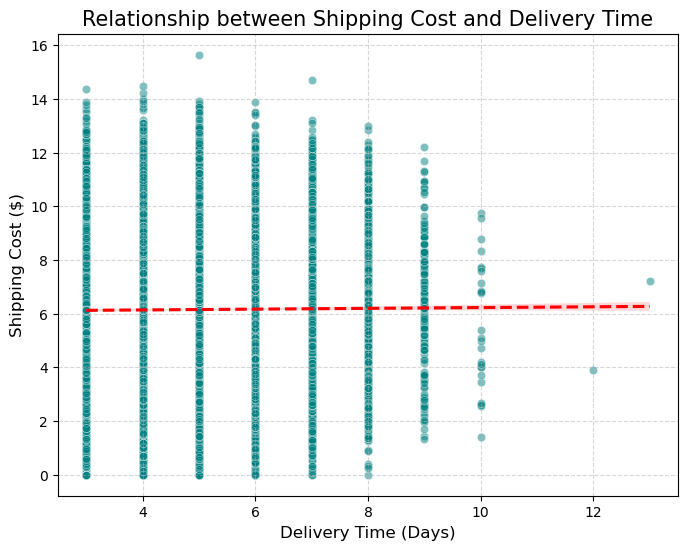

In [18]:
correlation = df['shipping_cost'].corr(df['delivery_time_days'])
print(f"Pearson Correlation (Shipping Cost vs. Delivery Time): r = {correlation:.4f}")

# Visualization: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='delivery_time_days', y='shipping_cost', data=df, alpha=0.5, color='teal')
sns.regplot(x='delivery_time_days', y='shipping_cost', data=df, scatter=False, color='red', line_kws={'linestyle':'--'}) # Trend line

plt.title('Relationship between Shipping Cost and Delivery Time', fontsize=15)
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.ylabel('Shipping Cost ($)', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.savefig('correlation_scatter_plot.png')
plt.show()

>> Statistical Conclusion: The Pearson correlation coefficient is extremely close to zero, indicating no linear relationship between how much you pay for shipping and how long the delivery takes.

>> Optimization Implication: This is a major sign of logistical inefficiency. The company is not paying for speed. High shipping costs are not translating into faster service. This provides strong support for reviewing all carrier contracts to ensure that cost is directly proportional to service quality (speed).

### 6) Conclusion

This analysis provides a data-backed roadmap for optimizing e-commerce profitability and delivery performance, shifting focus from simple metrics to causal drivers.

Concise Conclusion & Actionable Recommendations
1. **Profitability & Pricing Strategy (The Core Problem)**

Urgent Action: The Grocery category must be addressed immediately due to a statistically significant negative profit margin.

Key Insight (T-Test): High shipping costs are not the primary cause of low-margin orders; in fact, high-margin orders have higher average shipping costs. The focus must shift to reviewing Cost of Goods Sold (COGS) and aggressive Discount policies, as these are likely driving losses.

2. **Logistics Cost Drivers (Optimization Focus)**

Primary Cost Driver (MLR): Shipping cost is overwhelmingly predicted by Quantity (β≈0.70) and Price, while Region and Delivery Time are not statistically significant cost factors.

Recommendation: Negotiate new carrier contracts that focus on improving volume-based discounts. Since region and speed do not factor into cost, the company is likely using a national flat-rate or zone-insensitive structure. Optimization should target reducing the impact of high-quantity orders through better packaging consolidation.

3. **Delivery Inefficiency (Customer Experience)**

Inconsistency (σ): The Central and West regions exhibit the highest variability (σ) in delivery times, indicating the greatest risk of poor customer experience and requiring targeted logistical overhaul.

Efficiency Failure (Correlation): A near-zero correlation (r≈0.008) between shipping cost and delivery time reveals a fundamental failure: the company is not paying for speed. This necessitates an urgent audit of carrier performance to align payments with service quality.